# 3. Exploiting Correlation

In [2]:
import numpy as np
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Generating uncorrelated data

In [3]:
# Generate 5 uncorrelated Gaussian random variables
mean = 0.01
std_dev = 0.1
num_samples = 1000
num_variables = 5
seed = 42  # Seed for replicable results

np.random.seed(seed)
data = np.random.normal(mean, std_dev, (num_samples, num_variables))

data


array([[ 0.05967142, -0.00382643,  0.07476885,  0.16230299, -0.01341534],
       [-0.0134137 ,  0.16792128,  0.08674347, -0.03694744,  0.064256  ],
       [-0.03634177, -0.03657298,  0.03419623, -0.18132802, -0.16249178],
       ...,
       [ 0.17357978, -0.01210425,  0.01693698,  0.02925969,  0.24921096],
       [-0.19993563,  0.0783223 , -0.00148022,  0.06667717, -0.05573726],
       [ 0.0051035 ,  0.08114106,  0.32129102,  0.09080362, -0.07480656]],
      shape=(1000, 5))

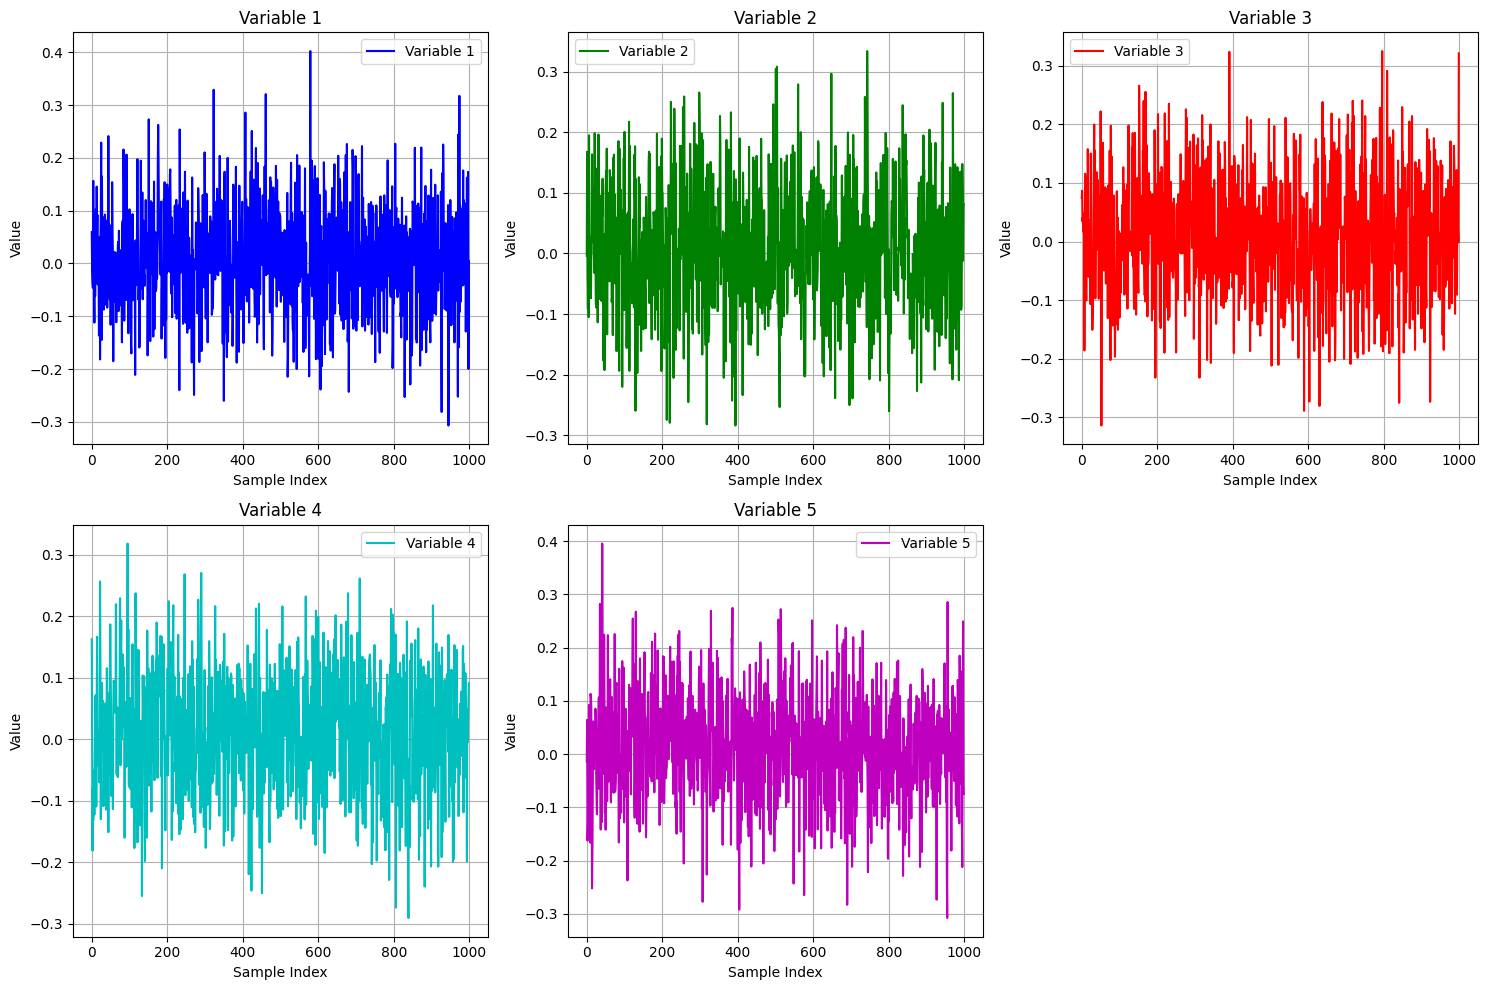

In [6]:
# Plot all data in the 'data' array in 5 subplots (3 columns and 2 rows)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
colors = ['b', 'g', 'r', 'c', 'm']  # Different default colors for each subplot
for i in range(num_variables):
    row = i // 3
    col = i % 3
    axs[row, col].plot(data[:, i], label=f'Variable {i+1}', color=colors[i])
    axs[row, col].set_xlabel('Sample Index')
    axs[row, col].set_ylabel('Value')
    axs[row, col].set_title(f'Variable {i+1}')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Remove the empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()


### PCA for synthetic data

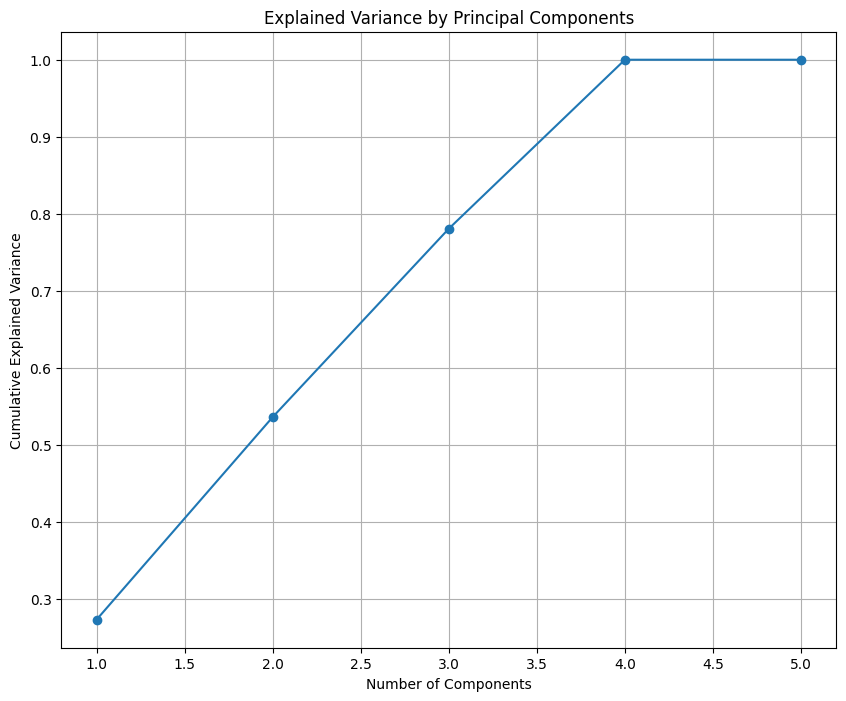

Principal Components:
 [[-0.4934639   0.66923409 -0.4666061  -0.06753579  0.29383122]
 [-0.30792745 -0.17645182 -0.20894308  0.87760933 -0.24533669]
 [ 0.03463518 -0.53372339 -0.31671394  0.04801206  0.78187395]
 [ 0.69029853  0.13674779 -0.67572767  0.04900904 -0.21395842]
 [ 0.42890839  0.46629376  0.4262698   0.46961019  0.44313435]]


In [7]:
# Step 1: Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Step 2: Calculate the covariance matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Perform PCA using the covariance matrix
pca = PCA()
pca.fit(covariance_matrix)

# Step 4: Transform the data using the PCA model
transformed_data = pca.transform(covariance_matrix)

# Step 5: Plot the explained variance ratio
plt.figure(figsize=(10, 8))
plt.plot([1, 2, 3, 4, 5], np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Step 6: Display the principal components
print("Principal Components:\n", pca.components_)


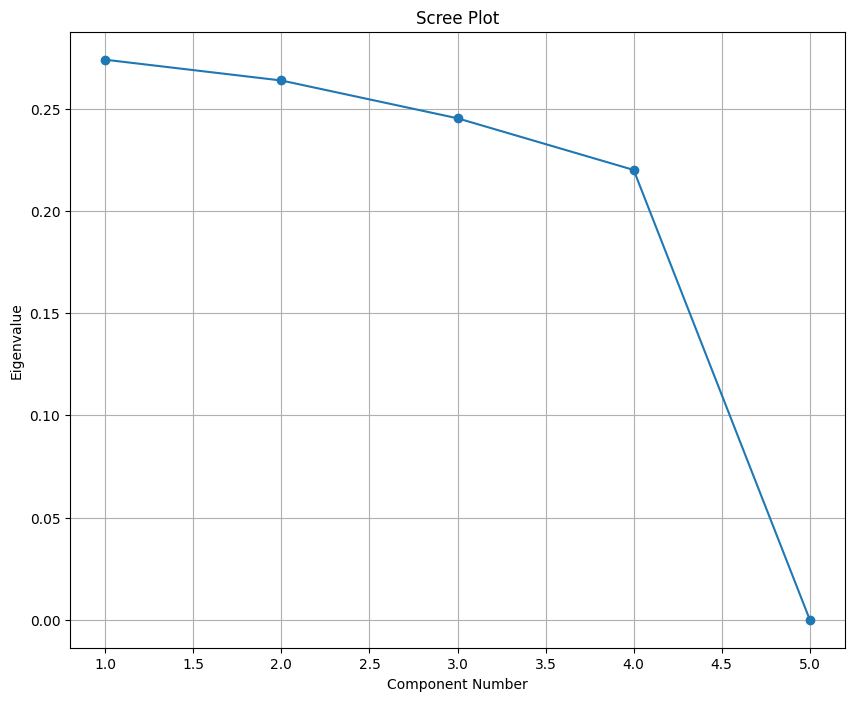

In [8]:
# Step 7: Produce a scree plot of the eigenvalues for each component
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


# Real data

### downloading 5 government securities
'^IRX': 13-week Treasury bill yield

'^FVX': 5-year Treasury note yield

'^TNX': 10-year Treasury note yield

'^TYX': 30-year Treasury bond yield

'^VIX': Volatility Index (often referred to as the "fear index")


In [9]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define the tickers for the 5 government securities
tickers = ['^IRX', '^FVX', '^TNX', '^TYX', '^VIX']

# Define the time period for the data collection
end_date = '2025-01-06'
start_date = (datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=182)).strftime('%Y-%m-%d')

# Fetch the daily closing yields for the specified period
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Display the first few rows of the data
print(data.head())


[*********************100%***********************]  5 of 5 completed

Ticker       ^FVX   ^IRX   ^TNX   ^TYX   ^VIX
Date                                         
2024-07-08  4.225  5.218  4.269  4.458  12.37
2024-07-09  4.248  5.225  4.300  4.495  12.51
2024-07-10  4.239  5.225  4.280  4.470  12.85
2024-07-11  4.123  5.198  4.193  4.404  12.92
2024-07-12  4.111  5.198  4.189  4.402  12.46


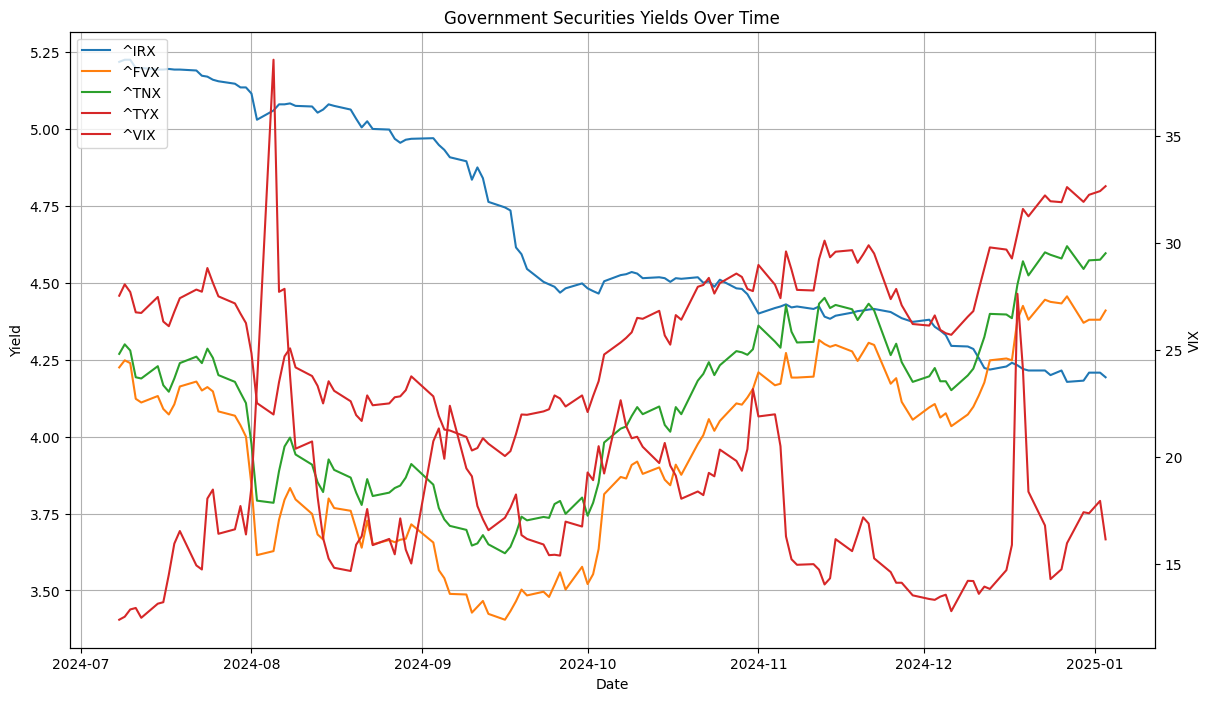

In [16]:
import matplotlib.pyplot as plt

# Plot the tickers in one single plot with a secondary y-axis for VIX
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the government securities yields
for ticker in tickers:
    if ticker != '^VIX':
        ax1.plot(data.index, data[ticker], label=ticker)

ax1.set_xlabel('Date')
ax1.set_ylabel('Yield')
ax1.grid(True)

# Create a secondary y-axis for VIX
ax2 = ax1.twinx()
ax2.plot(data.index, data['^VIX'], label='^VIX', color='tab:red')
ax2.set_ylabel('VIX')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Government Securities Yields Over Time')
plt.show()


In [10]:
# Ensure the Date column is in pandas datetime format
data.index = pd.to_datetime(data.index)

# Compute the daily yield changes
daily_yield_changes = data.diff().dropna()

# Display the first few rows of the daily yield changes
print(daily_yield_changes.head())


Ticker       ^FVX   ^IRX   ^TNX   ^TYX  ^VIX
Date                                        
2024-07-09  0.023  0.007  0.031  0.037  0.14
2024-07-10 -0.009  0.000 -0.020 -0.025  0.34
2024-07-11 -0.116 -0.027 -0.087 -0.066  0.07
2024-07-12 -0.012  0.000 -0.004 -0.002 -0.46
2024-07-15  0.021 -0.005  0.040  0.052  0.66


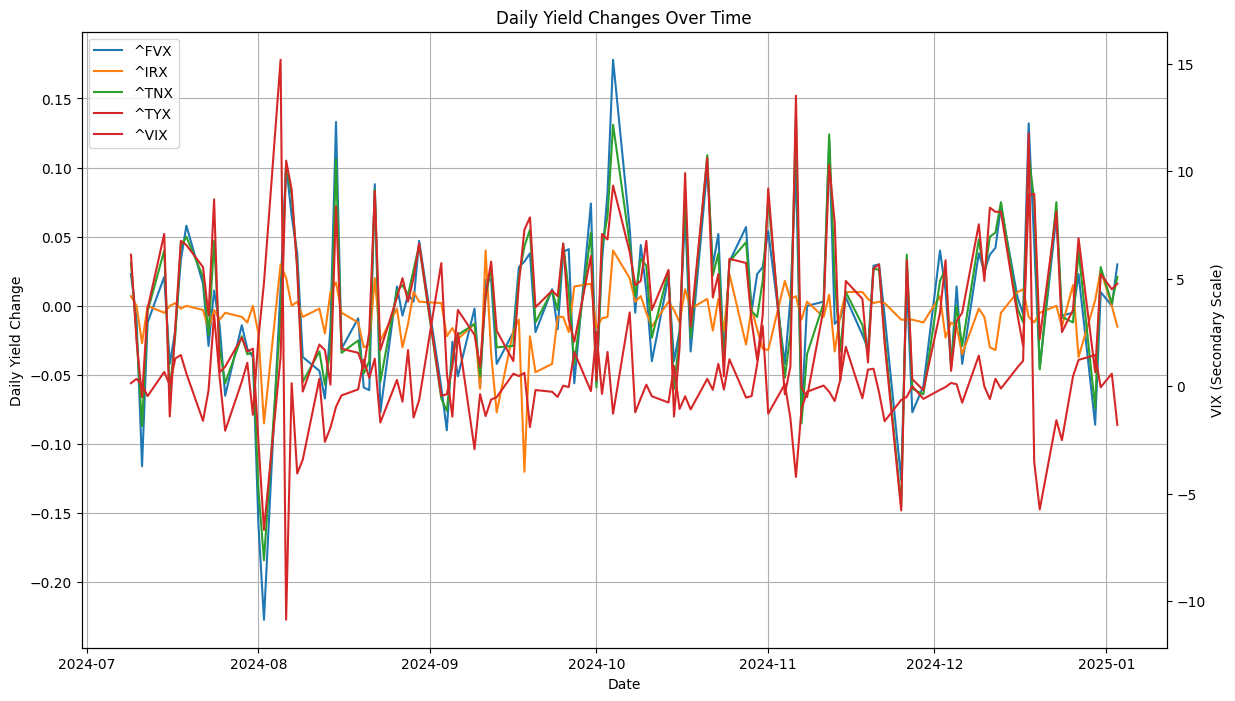

In [18]:
# Plot the daily changes in one single plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the daily yield changes for each ticker except VIX
for ticker in daily_yield_changes.columns:
    if ticker != '^VIX':
        ax1.plot(daily_yield_changes.index, daily_yield_changes[ticker], label=ticker)

ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Yield Change')
ax1.grid(True)

# Create a secondary y-axis for VIX
ax2 = ax1.twinx()
ax2.plot(daily_yield_changes.index, daily_yield_changes['^VIX'], label='^VIX', color='tab:red')
ax2.set_ylabel('VIX (Secondary Scale)')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Daily Yield Changes Over Time')
plt.show()


In [11]:
import numpy as np
from sklearn.decomposition import PCA

# Compute the covariance matrix of the daily yield changes
cov_matrix = np.cov(daily_yield_changes.T)

# Perform PCA on the covariance matrix
pca = PCA()
pca.fit(cov_matrix)

# Display the explained variance ratio of each principal component
print("Explained variance ratio of each principal component:")
print(pca.explained_variance_ratio_)

# Display the principal components
print("Principal components:")
print(pca.components_)


Explained variance ratio of each principal component:
[9.99999571e-01 4.22249085e-07 6.74475844e-09 5.59011369e-12
 1.82563765e-37]
Principal components:
[[-1.98613051e-03 -1.69597241e-04 -2.52968825e-03 -3.41369304e-03
   9.99988987e-01]
 [ 5.78942052e-01 -2.92245926e-02  5.90732787e-01  5.61236179e-01
   4.55520606e-03]
 [ 6.63308105e-01  3.88631504e-01 -2.36636469e-02 -6.39083099e-01
  -8.58177333e-04]
 [-4.43342756e-01  2.02440775e-01  7.92605255e-01 -3.66390276e-01
  -9.19039246e-05]
 [-1.68201410e-01  8.98403685e-01 -1.49148639e-01  3.77270800e-01
   7.28892006e-04]]


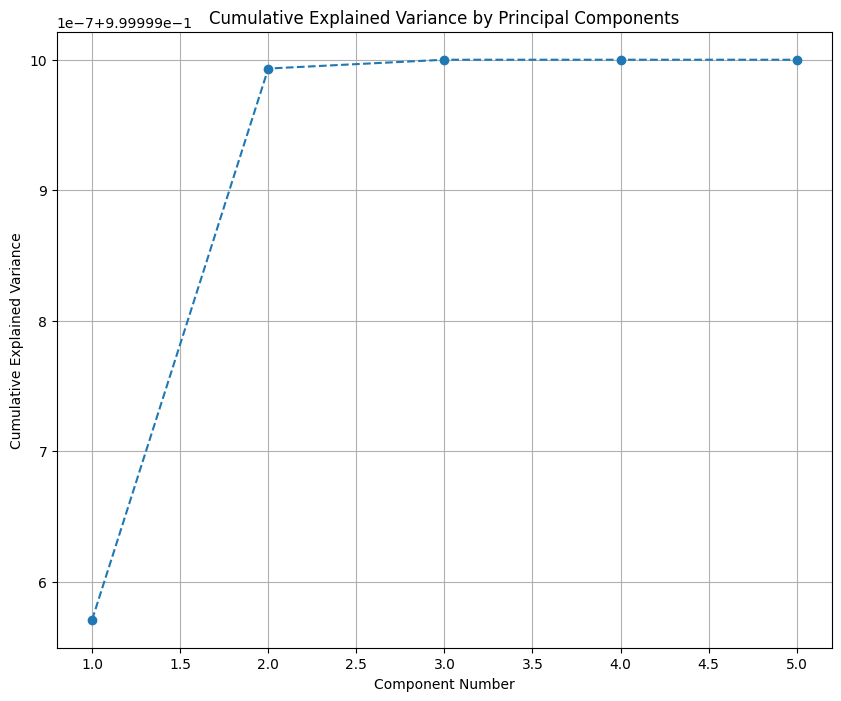

In [12]:
# Plot cumulative explained variance by principal components

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Component Number')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

plt.show()


In [13]:
explained_variance_ratio = pca.explained_variance_ratio_

for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"Component {i}: {variance:.4f} variance explained")


Component 1: 1.0000 variance explained
Component 2: 0.0000 variance explained
Component 3: 0.0000 variance explained
Component 4: 0.0000 variance explained
Component 5: 0.0000 variance explained


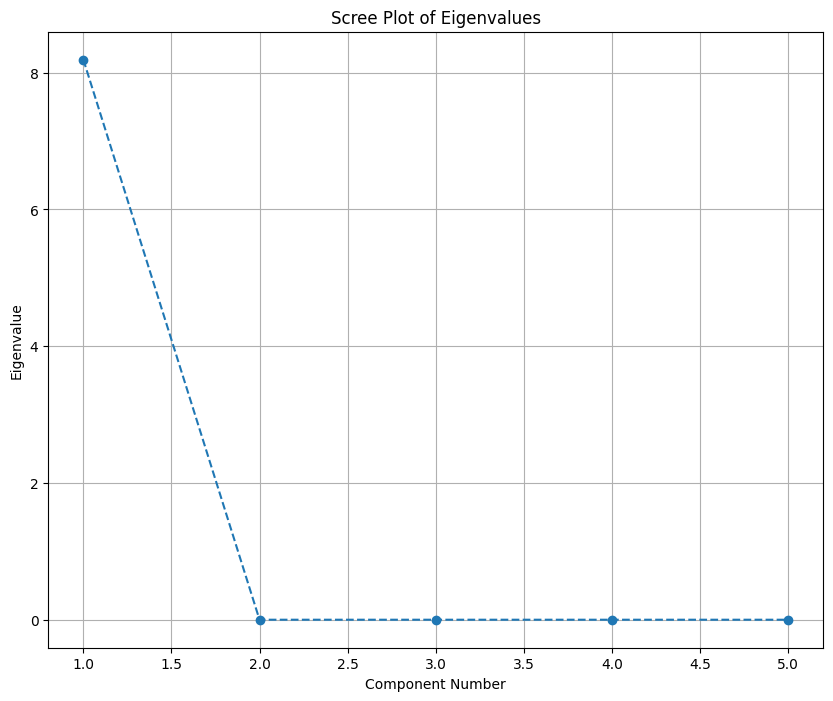

In [20]:
# Produce a screeplot of the eigenvalues for each component

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
